<a href="https://colab.research.google.com/github/drfperez/algorithms/blob/main/SimilitudArxius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving prova_p5_faces (2).zip to prova_p5_faces (2) (6).zip


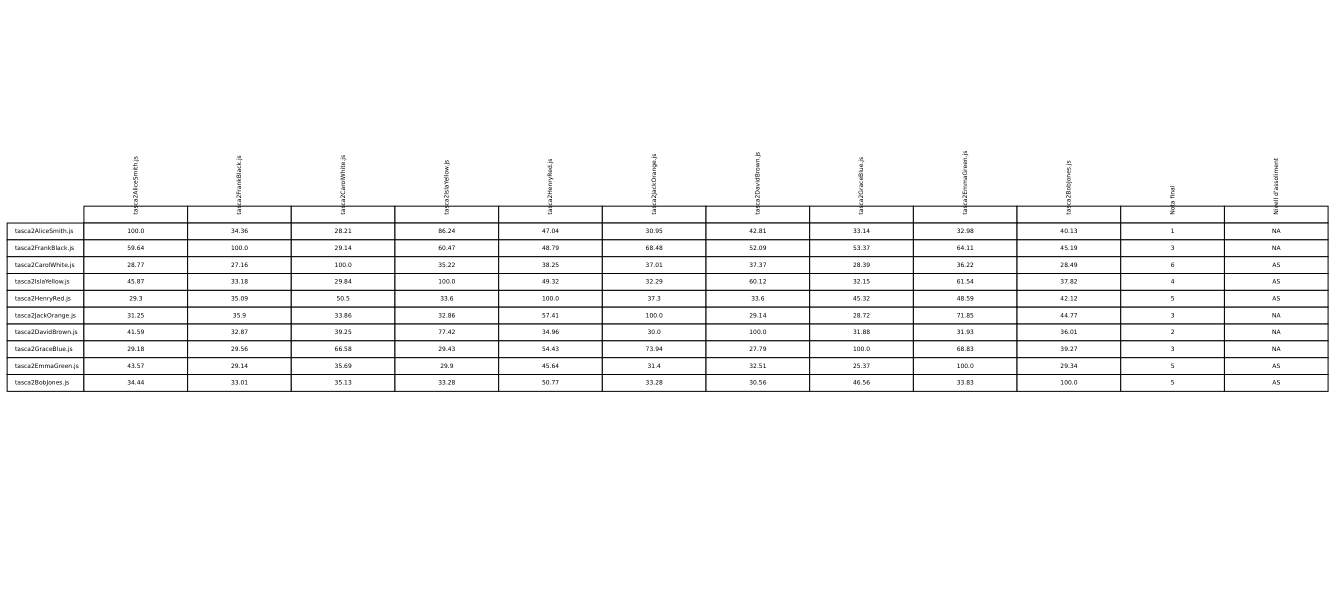

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Instal·lem les llibreries necessàries
!pip install pymupdf pillow chardet

import zipfile
import os
import difflib
import pandas as pd
from google.colab import files
import chardet
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display
import fitz  # PyMuPDF
from PIL import Image
import io

# 1️⃣ PUJADA DE L'ARXIU ZIP
uploaded = files.upload()

# 2️⃣ DESCOMPRIMIR L'ARXIU ZIP
zip_filename = list(uploaded.keys())[0]
extract_folder = "extracted_files"

if os.path.exists(extract_folder):
    os.system(f"rm -rf {extract_folder}")
os.makedirs(extract_folder)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# 3️⃣ LLEGIR ELS FITXERS DE TEXT
def detect_encoding(filepath):
    with open(filepath, 'rb') as f:
        raw_data = f.read()
    result = chardet.detect(raw_data)
    return result['encoding'] if result['encoding'] else 'utf-8'

file_contents = {}
allowed_extensions = ('.py', '.txt', '.js', '.html')
for root, _, files_list in os.walk(extract_folder):
    for filename in files_list:
        if filename.endswith(allowed_extensions):
            rel_path = os.path.relpath(os.path.join(root, filename), extract_folder)
            encoding = detect_encoding(os.path.join(root, filename))
            with open(os.path.join(root, filename), 'r', encoding=encoding, errors='ignore') as f:
                file_contents[rel_path] = f.read()

# 4️⃣ CALCULAR SIMILITUD ENTRE TOTS ELS FITXERS
students = list(file_contents.keys())
num_students = len(students)
similarity_matrix = pd.DataFrame(index=students, columns=students)

for i in range(num_students):
    for j in range(num_students):
        if i == j:
            similarity_matrix.iloc[i, j] = 100.0
        else:
            sm = difflib.SequenceMatcher(None, file_contents[students[i]], file_contents[students[j]])
            similarity_matrix.iloc[i, j] = round(sm.ratio() * 100, 2)

# 5️⃣ CALCULAR NOTA I ASSOLIMENT
def compute_grade(similarity):
    grade = round((100 - similarity) / 10)
    return max(0, min(10, grade))

def achievement_level(grade):
    if grade <= 3:
        return "NA"
    elif grade <= 6:
        return "AS"
    elif grade <= 8:
        return "AN"
    else:
        return "AE"

numeric_grades = {}
achievement_levels = {}

for student in students:
    other_similarities = similarity_matrix.loc[student].drop(student).astype(float).tolist()
    max_similarity = max(other_similarities) if other_similarities else 0
    grade_num = compute_grade(max_similarity)
    numeric_grades[student] = grade_num
    achievement_levels[student] = achievement_level(grade_num)

numeric_grades_df = pd.DataFrame.from_dict(numeric_grades, orient='index', columns=["Nota final"])
achievement_levels_df = pd.DataFrame.from_dict(achievement_levels, orient='index', columns=["Nivell d'assoliment"])

similarity_matrix = similarity_matrix.astype(float)
similarity_matrix = similarity_matrix.join(numeric_grades_df)
similarity_matrix = similarity_matrix.join(achievement_levels_df)

# 6️⃣ GUARDAR TAULA EN PDF HORITZONTAL
pdf_filename = "similarity_table.pdf"
with PdfPages(pdf_filename) as pdf:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=similarity_matrix.values,
                     colLabels=similarity_matrix.columns,
                     rowLabels=similarity_matrix.index,
                     cellLoc='center',
                     loc='center')

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.get_text().set_rotation(90)
            cell.get_text().set_va('bottom')
            cell.get_text().set_ha('center')

    table.auto_set_font_size(False)
    table.set_fontsize(6)
    table.scale(1.2, 1.2)

    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)

# 7️⃣ MOSTRAR EL PDF COM A IMATGES DINS DEL NOTEBOOK
doc = fitz.open(pdf_filename)
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    pix = page.get_pixmap()
    img = Image.open(io.BytesIO(pix.tobytes("png")))
    display(img)  # Mostra la imatge dins del notebook
files.download(pdf_filename)


In [ ]:
import zipfile
from google.colab import files

# Definim 10 fitxers amb noms i codis diferents en p5.js per dibuixar una cara
sample_files = {
    "tasca2AliceSmith.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(220);
  // Cara: color clar
  fill(255, 224, 189);
  ellipse(200, 200, 150, 150);
  // Ulls
  fill(0);
  ellipse(170, 180, 20, 20);
  ellipse(230, 180, 20, 20);
  // Somriure
  noFill();
  stroke(0);
  arc(200, 220, 80, 60, 0, PI);
}
""",
    "tasca2BobJones.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(180, 220, 255);
  // Cara rectangular
  fill(255, 230, 200);
  rect(125, 100, 150, 200, 20);
  // Ulls
  fill(0);
  ellipse(165, 160, 20, 20);
  ellipse(235, 160, 20, 20);
  // Boca
  noFill();
  stroke(0);
  arc(200, 240, 70, 40, 0, PI);
}
""",
    "tasca2CarolWhite.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(255, 240, 200);
  // Cara amb contorn
  fill(255, 210, 180);
  stroke(0);
  strokeWeight(2);
  ellipse(200, 200, 160, 160);
  // Ulls
  fill(0);
  noStroke();
  ellipse(170, 180, 18, 18);
  ellipse(230, 180, 18, 18);
  // Boca amb corba diferent
  noFill();
  stroke(0);
  strokeWeight(2);
  arc(200, 220, 90, 50, 0, PI);
}
""",
    "tasca2DavidBrown.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(200, 255, 200);
  // Cara: color verd suau
  fill(220, 245, 220);
  ellipse(200, 200, 140, 140);
  // Ulls
  fill(0);
  ellipse(165, 180, 15, 15);
  ellipse(235, 180, 15, 15);
  // Boca: somriure ample
  noFill();
  stroke(0);
  arc(200, 230, 100, 50, 0, PI);
}
""",
    "tasca2EmmaGreen.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(240, 255, 240);
  // Cara amb color diferent
  fill(255, 245, 230);
  ellipse(200, 200, 150, 150);
  // Ulls grans
  fill(0);
  ellipse(170, 170, 25, 25);
  ellipse(230, 170, 25, 25);
  // Boca: somriure petit
  noFill();
  stroke(0);
  arc(200, 220, 60, 30, 0, PI);
}
""",
    "tasca2FrankBlack.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(50);
  // Cara fosca
  fill(100);
  ellipse(200, 200, 150, 150);
  // Ulls brillants
  fill(255);
  ellipse(170, 180, 20, 20);
  ellipse(230, 180, 20, 20);
  // Boca: línia recta
  stroke(255);
  line(170, 240, 230, 240);
}
""",
    "tasca2GraceBlue.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(220, 230, 255);
  // Cara amb un toc blau
  fill(200, 220, 255);
  ellipse(200, 200, 150, 150);
  // Ulls
  fill(0);
  ellipse(170, 180, 20, 20);
  ellipse(230, 180, 20, 20);
  // Boca amb corba
  noFill();
  stroke(0);
  arc(200, 220, 80, 40, 0, PI);
  // Barbeta
  strokeWeight(2);
  line(200, 240, 200, 260);
}
""",
    "tasca2HenryRed.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(255, 200, 200);
  // Cara vermella
  fill(255, 180, 180);
  ellipse(200, 200, 150, 150);
  // Ulls amb ulleres
  fill(0);
  ellipse(170, 180, 18, 18);
  ellipse(230, 180, 18, 18);
  stroke(0);
  line(160, 180, 180, 180);
  line(220, 180, 240, 180);
  // Boca
  noFill();
  stroke(0);
  arc(200, 220, 80, 40, 0, PI);
}
""",
    "tasca2IslaYellow.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(255, 255, 200);
  // Cara de to groc suau
  fill(255, 245, 180);
  ellipse(200, 200, 150, 150);
  // Ulls
  fill(0);
  ellipse(170, 180, 20, 20);
  ellipse(230, 180, 20, 20);
  // Boca ampla i somrient
  noFill();
  stroke(0);
  arc(200, 230, 100, 50, 0, PI);
}
""",
    "tasca2JackOrange.js": """
function setup() {
  createCanvas(400, 400);
}
function draw() {
  background(255, 220, 180);
  // Cara amb to taronja suau
  fill(255, 200, 150);
  ellipse(200, 200, 150, 150);
  // Ulls
  fill(0);
  ellipse(170, 180, 20, 20);
  ellipse(230, 180, 20, 20);
  // Boca en forma de ceño (trista)
  noFill();
  stroke(0);
  arc(200, 230, 80, 40, PI, TWO_PI);
}
"""
}

zip_filename = "prova_p5_faces.zip"

# Creem l'arxiu ZIP i hi escrivim els 10 fitxers de prova
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for filename, content in sample_files.items():
        zipf.writestr(filename, content)

print("Arxiu zip creat:", zip_filename)
files.download(zip_filename)


Arxiu zip creat: prova_p5_faces.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>